In [18]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

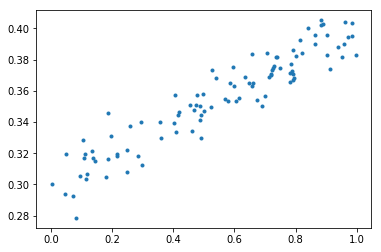

In [19]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data*0.1+0.3+noise
pylab.plot(x_data,y_data, '.')

In [20]:
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W*x_data+b
print(W)
print(b)

<tf.Variable 'Variable_4:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(1,) dtype=float32_ref>


In [21]:
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [22]:
print(tf.get_default_graph().as_graph_def())

In [23]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

print(sess.run([W,b]))

[array([ 0.5128864], dtype=float32), array([ 0.], dtype=float32)]


In [24]:
for step in range(201):
    sess.run(train)

print(sess.run([W,b]))

[array([ 0.10003456], dtype=float32), array([ 0.29997253], dtype=float32)]


(0, 1)

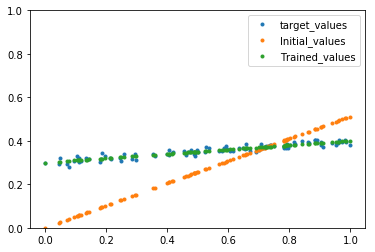

In [25]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".",label="Initial_values")
pylab.plot(x_data, sess.run(y),".", label="Trained_values")
pylab.legend()
pylab.ylim(0, 1)